# Intro to Models - Linear Regression

## Simple Linear Regression

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [47]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self, n_features: int): 
        np.random.seed(10)
        self.W = np.random.randn(n_features, 1) 
        self.b = np.random.randn(1) 
        
    def __call__(self, X): 
        ypred = np.dot(X, self.W) + self.b
        return ypred 
    
    def update_params(self, W, b):
        self.W = W 
        self.b = b 

In [48]:
model = SimpleLinearRegression(n_features=8) 
y_pred = model(X_test)  
print("Predictions:\n", y_pred[:10]) 

Predictions:
 [[ 253.64887091]
 [1178.81109955]
 [1191.10583277]
 [1261.41380265]
 [ 598.37555642]
 [2456.01921954]
 [ 513.29115284]
 [ 646.63866191]
 [ 859.69554241]
 [2174.25958221]]


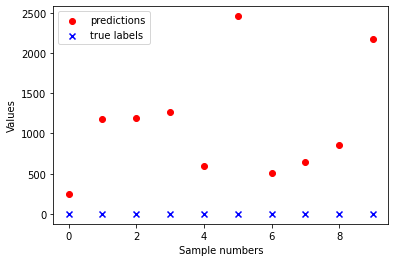

In [49]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

plot_predictions(y_pred[:10], y_test[:10])

In [50]:
print(model.W)
print(model.b)

[[ 1.3315865 ]
 [ 0.71527897]
 [-1.54540029]
 [-0.00838385]
 [ 0.62133597]
 [-0.72008556]
 [ 0.26551159]
 [ 0.10854853]]
[0.00429143]


In [51]:
X_test.iloc[0] @ model.W + model.b

array([253.64887091])

## Loss function - MSE

In [52]:
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors)
    
loss = mean_squared_error(np.array(y_pred), np.array(y_test))
print(round(loss, 2))

1276202.2


<p align=center><img width=900 src=.images/analytical_linear_reg.jpg></p>


In [53]:
def minimize_loss(X_train, y_train):
    X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    optimal_w = np.matmul(
        np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
        np.matmul(X_with_bias.T, y_train),
    )
    return optimal_w[1:], optimal_w[0]


weights, bias = minimize_loss(X_train, y_train)
print(weights, bias)

[ 4.33102288e-01  9.32362843e-03 -1.00332994e-01  6.15219175e-01
 -2.55110625e-06 -4.78180583e-03 -4.29077359e-01 -4.41484229e-01] -37.48696576531074


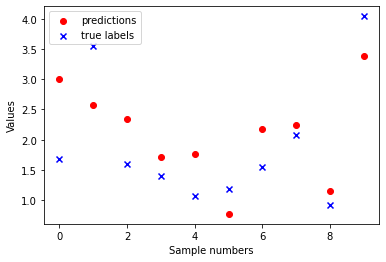

In [54]:
model.update_params(weights, bias)
y_pred = model(X_test)
plot_predictions(y_pred[:10], y_test[:10])

In [55]:
cost = mean_squared_error(y_pred, y_test)
print(cost)

0.5444842122134002


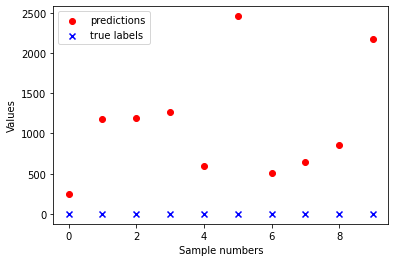

In [30]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

plot_predictions(y_pred[:10], y_test[:10])

## Using sklearn's LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [18]:
cols = list(X.columns)
list(zip(cols, lr.coef_))

[('MedInc', 0.4486749096657166),
 ('HouseAge', 0.00972425751790478),
 ('AveRooms', -0.12332334282795829),
 ('AveBedrms', 0.7831449067929723),
 ('Population', -2.029620580093136e-06),
 ('AveOccup', -0.0035263184871342453),
 ('Latitude', -0.41979248658836077),
 ('Longitude', -0.43370806496398734)]

In [11]:
lr.intercept_

-37.0232777060639